In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [13]:
def xgboost(train, label_train, test, label_test, evaluate = 't', search = 'g'):
    import xgboost as xgb
    xgb_params = {'max_depth': [3,4,5], 
              'learning_rate': [x/10 for x in list(range(1,6))],
              'n_estimators': [30, 35, 50],
              'objective': ['binary:logistic']}
    xgb_model = xgb.XGBClassifier(gamma=1, random_state=42, reg_lambda=200, use_label_encoder=False, eval_metric = 'logloss')
    if search == 'g':
        xgb_model = GridSearchCV(xgb_model, xgb_params, scoring='roc_auc')
        xgb_model.fit(train, label_train)
        print(xgb_model.best_estimator_)
    else:
        xgb_model = RandomizedSearchCV(xgb_model, xgb_params)
        xgb_model.fit(train, label_train)
        print(xgb_model.best_params_)
        print(xgb_model.best_score_)
        
    if evaluate == 't':
        evaluate_model(xgb_model, train, label_train)
    else:
        evaluate_model(xgb_model, test, label_test)
    

In [14]:
def randomforest(train, label_train, test, label_test, evaluate = 't', search = 'g'):
    rfc_params = {'n_estimators': [100, 150, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [5,6],
                'criterion' :['gini', 'entropy'],
                'random_state': [42]}

    rfc_model = RandomForestClassifier()

    if search == 'g':
        rfc_model = GridSearchCV(rfc_model, rfc_params, scoring='roc_auc')
        rfc_model = rfc_model.fit(train, label_train)
        print(rfc_model.best_estimator_)
    else:
        rfc_model = RandomizedSearchCV(rfc_model, rfc_params)
        rfc_model = rfc_model.fit(train, label_train)
        print(rfc_model.best_params_)
        print(rfc_model.best_score_)

    if evaluate == 't':
        evaluate_model(rfc_model, train, label_train)
    else:
        evaluate_model(rfc_model, test, label_test)

In [15]:
def decisiontree (train, label_train, test, label_test, evaluate = 't', search = 'g'):
    dt_params = {"criterion":['gini','entropy'],
                 'max_depth':[3,4,5,6,7,8],
                 'random_state': [42]}

    dt_model = DecisionTreeClassifier()
    if search == 'g':
        dt_model = GridSearchCV(dt_model, dt_params, scoring='roc_auc')
        dt_model.fit(train, label_train)
        print(dt_model.best_estimator_)
    else:
        dt_model = RandomizedSearchCV(dt_model, dt_params)
        dt_model = dt_model.fit(train, label_train)
        print(dt_model.best_params_)
        print(dt_model.best_score_)
    
    if evaluate == 't':
        evaluate_model(dt_model, train, label_train)
    else:
        evaluate_model(dt_model, test, label_test)

In [16]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(set(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)

In [17]:
train_data = pd.read_csv('10_weekly_train.csv')
test_data = pd.read_csv('10_weekly_test.csv')

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_mov = train_data["movement"]
test_mov = test_data["movement"]
col_name = train_data.drop(["movement"],1).columns
train_data[col_name] = scaler.fit_transform(train_data.drop(["movement"],1))
test_data[col_name] = scaler.fit_transform(test_data.drop(["movement"],1))
train_data["movement"] = train_mov
test_data["movement"] = test_mov

In [19]:
label_train = train_data["movement"].astype(int)
train = train_data.drop(["Close (t)","movement"],1)
label_test = test_data["movement"].astype(int)
test = test_data.drop(["Close (t)","movement"],1)

{'objective': 'binary:logistic', 'n_estimators': 30, 'max_depth': 3, 'learning_rate': 0.2}
0.5135091425657463
accuracy: 0.5611601513240857
precision: 0.5320080174685381
recall: 0.5611601513240857
f1 0.5381131895743443
metrics.roc_auc_score 0.5038324240587324
              precision    recall  f1-score   support

           0       0.39      0.26      0.31       303
           1       0.62      0.75      0.68       490

    accuracy                           0.56       793
   macro avg       0.50      0.50      0.50       793
weighted avg       0.53      0.56      0.54       793



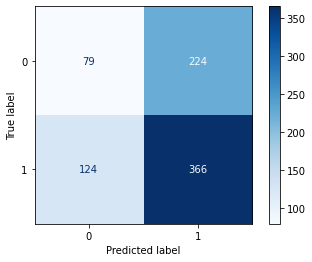

In [20]:
#xgb_g_train = xgboost(train, label_train, test, label_test)
#xgb_g_test = xgboost(train, label_train, test, label_test,  evaluate = 's')
#xgb_r_train = xgboost(train, label_train, test, label_test, search = 'r')
xgb_r_test = xgboost(train, label_train, test, label_test, evaluate = 's', search = 'r')

In [21]:
#rfc_g_train = randomforest(train, label_train, test, label_test, )
#rfc_g_test = randomforest(train, label_train, test, label_test,  evaluate = 's')
#rfc_r_train = randomforest(train, label_train, test, label_test,  search = 'r')
#rfc_r_test = randomforest(train, label_train, test, label_test,  evaluate = 's', search = 'r')

{'random_state': 42, 'max_depth': 3, 'criterion': 'entropy'}
0.5372870984191739
accuracy: 0.501891551071879
precision: 0.5166219254334009
recall: 0.501891551071879
f1 0.507414971397478
metrics.roc_auc_score 0.48799083990031655
              precision    recall  f1-score   support

           0       0.37      0.43      0.40       303
           1       0.61      0.55      0.58       490

    accuracy                           0.50       793
   macro avg       0.49      0.49      0.49       793
weighted avg       0.52      0.50      0.51       793



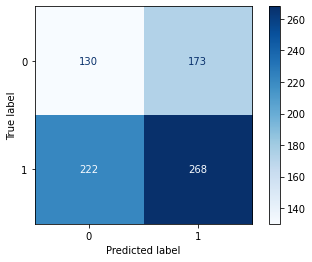

In [22]:
#dt_g_train = decisiontree(train, label_train, test, label_test)
#dt_g_test = decisiontree(train, label_train, test, label_test, evaluate = 's')
#dt_r_train = decisiontree(train, label_train, test, label_test, search = 'r')
dt_r_test = decisiontree(train, label_train, test, label_test, evaluate = 's', search = 'r')